In [ ]:
import pandas as pd 
import zipfile
with zipfile.ZipFile("./data/2016.zip") as f:
    f.extractall("./2016_subway")

In [ ]:
import os
roots = "./2016_subway/"
total = []
for file in os.listdir(roots):
    if file.split(".")[-1] == "csv":
        total.append(pd.read_csv(roots + file, encoding='cp949'))

In [13]:
import os 
roots = "./2016_subway/"

for file in os.listdir(roots):
    if file.split(".")[-1] == "csv":
        locals()[file.split(".")[0]] = pd.read_csv(roots + file, encoding='cp949')

    

In [11]:
locals()['a'] = 10

In [12]:
a

10

In [16]:
import os
roots = "./2016_subway/"
total = {}
for file in os.listdir(roots):
    if file.split(".")[-1] == "csv":
        total[file.split(".")[0]] = pd.read_csv(roots + file, encoding='cp949')

In [ ]:
sorted(total.items(), key=lambda x : x[0])

In [21]:
for key, value in sorted(total.items(), key=lambda x : x[0]):
    print(key, end=" --> ")
    print(value.columns)
    print("-" * 50)

Subway_201601 --> Index(['날짜', '호선', '역명', '구 분', '할인', '04 ~ 05', '05 ~ 06', '06 ~ 07',
       '07 ~ 08', '08 ~ 09', '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13',
       '13 ~ 14', '14 ~ 15', '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19',
       '19 ~ 20', '20 ~ 21', '21 ~ 22', '22 ~ 23', '23 ~ 24', '00 ~ 01',
       '01 ~ 02', '02 ~ 03', '03 ~ 04'],
      dtype='object')
--------------------------------------------------
Subway_201602 --> Index(['날짜', '호선', '역명', '구 분', '할인', '04 ~ 05', '05 ~ 06', '06 ~ 07',
       '07 ~ 08', '08 ~ 09', '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13',
       '13 ~ 14', '14 ~ 15', '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19',
       '19 ~ 20', '20 ~ 21', '21 ~ 22', '22 ~ 23', '23 ~ 24', '00 ~ 01',
       '01 ~ 02', '02 ~ 03', '03 ~ 04'],
      dtype='object')
--------------------------------------------------
Subway_201603 --> Index(['날짜', '호선', '역명', '구 분', '할인', '04 ~ 05', '05 ~ 06', '06 ~ 07',
       '07 ~ 08', '08 ~ 09', '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~

In [ ]:
help(pd.concat)

In [26]:
df1 = pd.concat([Subway_201601, Subway_201602, Subway_201603, Subway_201604, Subway_201605] , ignore_index=True)

In [28]:
df1.columns

Index(['날짜', '호선', '역명', '구 분', '할인', '04 ~ 05', '05 ~ 06', '06 ~ 07',
       '07 ~ 08', '08 ~ 09', '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13',
       '13 ~ 14', '14 ~ 15', '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19',
       '19 ~ 20', '20 ~ 21', '21 ~ 22', '22 ~ 23', '23 ~ 24', '00 ~ 01',
       '01 ~ 02', '02 ~ 03', '03 ~ 04'],
      dtype='object')

In [33]:
df1 = df1.groupby(['날짜', '호선', '역명', '구 분'], as_index=False).sum().drop('할인', axis=1)

In [34]:
df1.head(3)

,날짜,호선,역명,구 분,04 ~ 05,05 ~ 06,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,...,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,00 ~ 01,01 ~ 02,02 ~ 03,03 ~ 04
0,2016-01-01,1호선,동대문(155),승차,6,147,168,170,293,479,...,625,614,475,414,291,138,6,0,0,0
1,2016-01-01,1호선,동대문(155),하차,0,31,164,146,164,354,...,869,827,660,614,471,348,122,0,0,0
2,2016-01-01,1호선,동묘앞(159),승차,5,37,65,66,110,161,...,404,198,139,136,81,52,2,0,0,0


In [38]:
for x in range(6,12):
    print("Subway_2016{:02}".format(x))

Subway_201606
Subway_201607
Subway_201608
Subway_201609
Subway_201610
Subway_201611


In [42]:
tmp = [eval("Subway_2016{:02}".format(x)) for x in range(6,12)]

In [44]:
df2 = pd.concat([eval("Subway_2016{:02}".format(x)) for x in range(6,12)], ignore_index=True)

In [ ]:
df1[['역명', '호선']]

,역명,호선
0,동대문(155),1호선
1,동대문(155),1호선
2,동묘앞(159),1호선
3,동묘앞(159),1호선
4,서울역(150),1호선
...,...,...
36171,한성대입구(419),4호선
36172,혜화(420),4호선
36173,혜화(420),4호선
36174,회현(425),4호선


In [51]:
df2.shape

(43554, 24)

In [56]:
df1[['역명', '호선']].shape

(36176, 2)

In [ ]:
tmp3 = pd.merge(df2, df1[['역명', '호선']].drop_duplicates(), left_on=['역명'], right_on=['역명'], how='left')

In [69]:
df2 = pd.merge(df2, df1[['역명', '호선']].drop_duplicates(), left_on=['역명'], right_on=['역명'], how='left')

In [58]:
tmp.duplicated().sum()

np.int64(13196862)

In [59]:
tmp2 = tmp.drop_duplicates()

In [60]:
tmp2.shape

(43554, 25)

In [65]:
Subway_201612.columns = [x.replace("시", "") for x in Subway_201612.columns]

In [75]:
df1.columns = ["".join(x.split())  for x in df1.columns]

In [79]:
df1.columns.size

28

In [81]:
set(df1.columns) - set(df2.columns)

{'02~03', '03~04', '04~05'}

In [85]:
df_1_2 = pd.concat([df1.drop(list(set(df1.columns) - set(df2.columns)), axis=1), df2], ignore_index=False)

In [ ]:
df3 = pd.merge(Subway_201612, df1[['역명', '호선']].drop_duplicates(), left_on=['역명'], right_on=['역명'], how='left')

In [97]:
len(set(df_1_2.columns) & set(df3.columns))

25

In [99]:
subway_df = pd.concat([df_1_2, df3])

In [111]:
subway_df['합계'] = subway_df.loc[:,"05~06":].apply(lambda x : sum(x), axis=1)

10523

In [120]:
subway_df.loc[subway_df.구분 == "승차"].groupby(['역명'])[['합계']].sum().sort_values(by=['합계'], ascending=False)

,합계
역명,
강남(222),36262673
잠실(216),31080170
홍대입구(239),28015621
신림(230),26680680
구로디지털단지(232),23104249
...,...
용두(250),830473
남태령(434),597887
신답(245),494357


In [123]:
홍대 = subway_df[subway_df.역명 == "홍대입구(239)"]

In [132]:
홍대 = pd.concat([홍대, 홍대.날짜.str.split("-",expand=True)], axis=1)

In [136]:
홍대.rename(columns={0:'연도', 1:'월', 2:'일'}, inplace=True)

In [142]:
import matplotlib.pyplot as plt

<Axes: xlabel='월'>

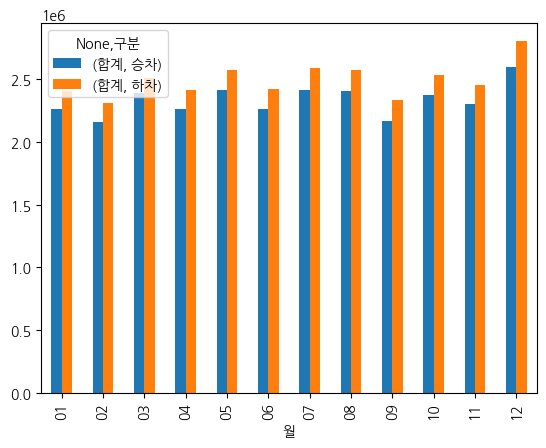

In [143]:
plt.rcParams['font.family'] = 'NanumGothic'
홍대.groupby(["월", '구분'])[['합계']].sum().unstack().plot.bar()